In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log , sqrt
import pandas as pd
import numpy as np
%matplotlib inline

import nltk
nltk.download('punkt')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My\ Drive

mails = pd.read_csv("spam_dataset.csv"  , encoding='latin-1')
mails.head()

/content/drive/My Drive


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


As we don't need the unnamed columns we remove the columns which are unnamed 

In [4]:
cols_of_interest = ['v1' , 'v2']
mails = mails[cols_of_interest]
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Now we rename column v2 as message and v1 as label and label ham as 0 and spam as 1 

In [5]:
mails.rename(columns={'v1':'labels' , 'v2':'messages'} , inplace = True)
mails['label'] = mails['labels'].map({'ham':0 , 'spam':1})
mails.head()

,labels,messages,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [7]:
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
trainIndex = []
testIndex = []

for i in range(mails.shape[0]):
  if np.random.uniform(0,1) < 0.75:
    trainIndex.append(i)
  else:
    testIndex.append(i)

train_set = mails.loc[trainIndex]
test_set = mails.loc[testIndex]


print(train_set.shape)
print(test_set.shape)

print(train_set.head())
print('')
print(test_set.head())

(4162, 2)
(1410, 2)
                                            messages  label
0  Go until jurong point, crazy.. Available only ...      0
1                      Ok lar... Joking wif u oni...      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0

                                             messages  label
5   FreeMsg Hey there darling it's been 3 week's n...      1
9   Had your mobile 11 months or more? U R entitle...      1
17  Eh u remember how 2 spell his name... Yes i di...      0
21  IÛ÷m going to try for 2 months ha ha only joking      0
28  I'm back &amp; we're packing the car now, I'll...      0


In [9]:
train_set.reset_index(inplace=True)
train_set.drop(['index'] , axis = 1 , inplace = True)
train_set.head()


,messages,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
test_set.reset_index(inplace=True)
test_set.drop(['index'] , axis = 1 , inplace = True)
test_set.head()


,messages,label
0,FreeMsg Hey there darling it's been 3 week's n...,1
1,Had your mobile 11 months or more? U R entitle...,1
2,Eh u remember how 2 spell his name... Yes i di...,0
3,IÛ÷m going to try for 2 months ha ha only joking,0
4,"I'm back &amp; we're packing the car now, I'll...",0


In [11]:
total = train_set['label'].value_counts()
print("ham - {}".format(total[0]))
print("spam - {}".format(total[1]))

ham - 3631
spam - 531


In [12]:
total1 = test_set['label'].value_counts()
print("ham - {}".format(total1[0]))
print("spam - {}".format(total1[1]))

ham - 1194
spam - 216


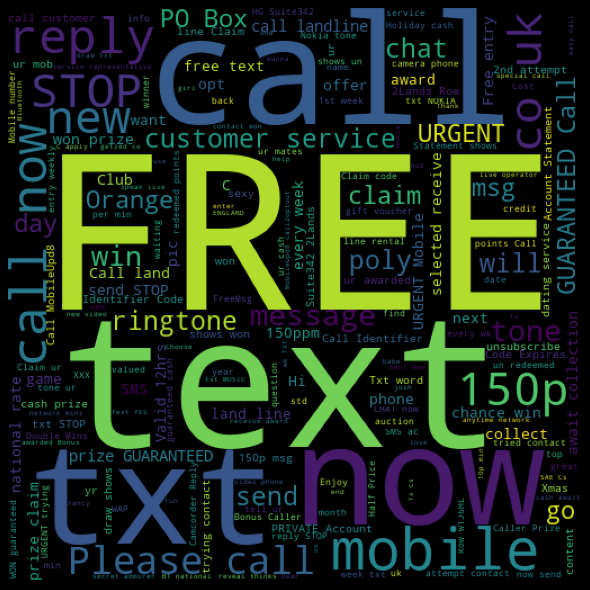

In [13]:
spam_list = list(mails[mails['label'] == 1]['messages'])
# To visulaize words using worldcloud  we have to append all of the messages into a single string  
spam_words = ' '.join(spam_list)
spam_cloud = WordCloud(width = 512 , height= 512).generate(spam_words)
plt.figure(figsize= (10,8) , facecolor= 'k' )
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show() 

#we can see that the words which are most repeated are highlighted and enlarged ,i.e words with most frequency are highlighted 
# As we plotted the spam words we can see that most used words are FREE , call , Text now , etc .

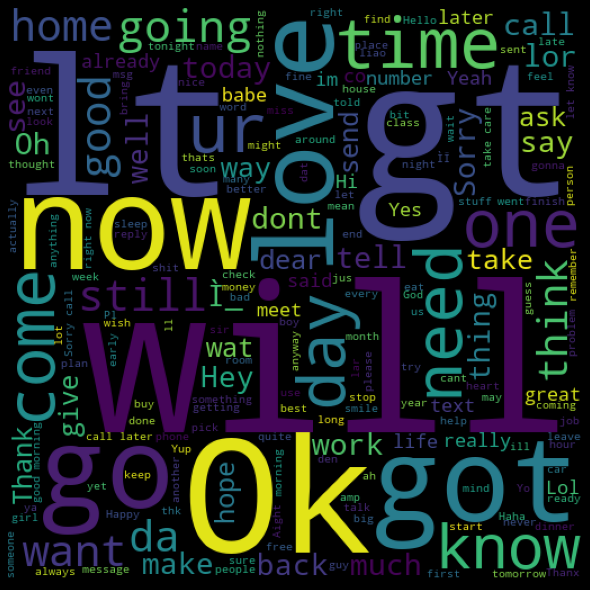

In [14]:
ham_list = mails[mails['label'] == 0]['messages']
ham_words = ' '.join(ham_list)
ham_cloud = WordCloud(width = 512 , height = 512).generate(ham_words)
plt.figure(figsize= (10,8) , facecolor= 'k')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [15]:
total = train_set['label'].value_counts()
print("ham - {}".format(total[0]))
print("spam - {}".format(total[1]))
train_set.head()

ham - 3631
spam - 531


,messages,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
total1 = test_set['label'].value_counts()
print("ham - {}".format(total1[0]))
print("spam - {}".format(total1[1]))
test_set.head()

ham - 1194
spam - 216


,messages,label
0,FreeMsg Hey there darling it's been 3 week's n...,1
1,Had your mobile 11 months or more? U R entitle...,1
2,Eh u remember how 2 spell his name... Yes i di...,0
3,IÛ÷m going to try for 2 months ha ha only joking,0
4,"I'm back &amp; we're packing the car now, I'll...",0


In [18]:
# Pre-processing 
# convert all the words into lowercase letters 
# Then tokenization of the words by removing special characters 
# Remove the words which have almost same meaning like go , goes , going by stemming using porter Stemmer
# Then going to remove stop Words these are the words which have high frequency and does not have impact on the sentence like or, the, is ,etc.

def process_message(message , lower_case = True , stem = True , stop_words = True , gram = 2):
  if lower_case:
    message = message.lower()
  words = word_tokenize(message)
  words = [w for w in words if len(w) > 2 ]

  if gram > 1 :
    w =[]
    for i in range(len(words) - gram + 1):
      w += [' '.join(words[i:i+gram])]
    return w
    
  if stop_words :
    sw = stopwords.words('english')
    words = [word for word in words if word not in sw]
  
  if stem :
    stemmer = PorterStemmer()
    words = [Stemmer.stem(word) for word in words]
  return words 




In [17]:
# implementing two techniques
#Bag of words 
#TF-IDF

class SpamClassifier(object):
  def __init__(self,train_set , method = 'tf-idf'):
    self.mails , self.labels = train_set['messages'] , train_set['label']
    self.method = method
  


  def train(self):
    self.calc_TF_and_IDF()
    if self.method == 'tf-idf':
      self.calc_TF_IDF()
    else:
      self.calc_prob()


  # Bag of Words method
  def calc_prob(self):
    self.prob_spam = {}  # calculating probabilites for each spam word and store it in a form of dictionary ,i.e key:word , value: p(word|spam)
    self.prob_ham = {}  # calculating probabilites for each ham word and store it in a form of dictionary , i.e  key:word  , value: p(word|ham)

    for word in self.tf_spam:
      # here the somoothening formula is being used and alpha = 1
      self.prob_spam[word] = (self.tf_spam[word] + 1)/(self.spam_words + len(list(self.tf_spam.keys())) ) 
          
    for word in self.tf_ham:
      # here the somoothening formula is being used and alpha = 1
      self.prob_ham[word] = (self.tf_ham[word] + 1)/(self.ham_words + len(list(self.tf_ham.keys())) ) 
      
    # calculating p(spam) , p(ham)
    self.prob_spam_mail , self.prob_ham_mail = self.spam_mails / self.total_mails , self.ham_mails / self.total_mails



  def calc_TF_and_IDF(self):
    totalMessages = self.mails.shape[0]
    self.spam_mails , self.ham_mails = self.labels.value_counts()[1] , self.labels.value_counts()[0]
    self.total_mails = self.spam_mails + self.ham_mails
    
    self.spam_words = 0 #to calculate sum of a tf frequecncies of all the spam words which will be used in the probability calculation
    self.ham_words = 0  #to calculate sum of a tf frequecncies of all the ham words which will be used in the probability calculation
    
    self.tf_spam = {}
    self.tf_ham = {}
    self.idf_spam = {}
    self.idf_ham = {}

    for i in range(totalMessages):
      processed_message = process_message(self.mails[i])
      
      count = []#To keep track of whether the word has ocured in the message or not.
                 #used for calculating IDF
      
      for word in processed_message:
        if self.labels[i]:
          self.tf_spam[word] = self.tf_spam.get(word , 0) + 1
          self.spam_words += 1  #to calculate sum of a tf frequecncies of all the spam words which will be used in the probability calculation
        else:
          self.tf_ham[word] = self.tf_ham.get(word , 0) + 1
          self.ham_words += 1  #to calculate sum of a tf frequecncies of all the ham words which will be used in the probability calculation
        
        if word not in count:
          count += [word]
        
      for word in count:
        if self.labels[i]:
          self.idf_spam[word] = self.idf_spam.get(word , 0) + 1  # total no of spam  messages containing word w
        else:
          self.idf_ham[word] = self.idf_ham.get(word , 0) + 1  # total no of ham messages containing word w


  
  # TF-IDF method
  def calc_TF_IDF(self):
    self.prob_spam = {}
    self.prob_ham = {}
    self.sum_tf_idf_spam = 0 #for calculating denominator i.e summation of product of TF(word|spam) * IDF(word) 
    self.sum_tf_idf_ham = 0 #for calculating denominator i.e summation of product of TF(word|ham) * IDF(word) 
    
    for word in self.tf_spam:
      self.prob_spam[word] = (self.tf_spam[word]) * log( (self.spam_mails + self.ham_mails) / (self.idf_spam[word] + self.idf_ham.get(word,0)) )
      self.sum_tf_idf_spam += self.prob_spam[word]
    
    for word in self.tf_spam:
      self.prob_spam[word] = (self.prob_spam[word] + 1)/(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
    
    for word in self.tf_ham:
      self.prob_ham[word] = self.tf_ham[word] * log( (self.spam_mails + self.ham_mails) / (self.idf_spam.get(word,0) + self.idf_ham[word]) )
      self.sum_tf_idf_ham += self.prob_ham[word]
    
    for word in self.tf_ham:
      self.prob_ham[word] = self.prob_ham[word] / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
    
    self.prob_spam_mail , self.prob_ham_mail = self.spam_mails / self.total_mails , self.ham_mails / self.total_mails
  

  def classify(self , processed_message):
    pSpam , pHam = 0,0

    # taking log of p(w1|spam)*p(w2|spam)*......*p(wn|spam)
    for word in processed_message:
      if word in self.prob_spam:
        pSpam += log(self.prob_spam[word])
      else:
        if self.method == 'tf-idf':
          pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
        else:
          pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
      
      if word in self.prob_ham:
        pHam += log(self.prob_ham[word])
      else:
        if self.method == 'tf-idf':
          pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
        else:
          pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
    
      pSpam += log(self.prob_spam_mail)
      pHam += log(self.prob_ham_mail)

    return pSpam >= pHam


  def predict(self,testData):
    result = {}

    for (i,message) in enumerate(testData):
      processed_message = process_message(message)
      result[i] = int(self.classify(processed_message))

    return result  
    

In [19]:
def metrics(labels , predictions):
  true_spam , true_ham , false_spam , false_ham = 0,0,0,0
  for i in range(len(labels)):
    true_spam += int(labels[i] == 1 and predictions[i] == 1)
    true_ham += int(labels[i] == 0 and predictions[i] == 0 )
    false_spam += int(labels[i] == 0 and predictions[i] == 1 )
    false_ham += int(labels[i] == 1 and predictions[i] == 0)
  
  precision = true_spam / (true_spam + false_spam)
  recall = true_ham / (true_spam + false_ham)
  Fscore = 2*precision*recall / (precision + recall)
  accuracy = (true_spam + true_ham) / (true_spam + true_ham + false_spam + false_ham)

  print("precision : " , precision )
  print("recall : " ,recall)
  print("Fscore : " , Fscore)
  print("accuracy : ", accuracy) 

In [20]:

sc_tf_idf = SpamClassifier(train_set , 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_set['messages'])
metrics(test_set['label'] , preds_tf_idf)


precision :  0.9156626506024096
recall :  5.462962962962963
Fscore :  1.5684354122214839
accuracy :  0.9446808510638298


In [21]:
sc_bow = SpamClassifier(train_set, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(test_set['messages'])
metrics(test_set['label'], preds_bow)

precision :  0.8962962962962963
recall :  5.462962962962963
Fscore :  1.5399383075562456
accuracy :  0.922695035460993


In [27]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)


False

In [33]:
pm = process_message('The IRS is Trying to Contact You' )
sc_tf_idf.classify(pm)

True